In [137]:
from intcode import intcode, chain_intercodes, looping_intcodes
from collections import defaultdict
import itertools
import copy
import random
import numpy
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
with open('../inputs/19', 'r') as f:
    file_lines = f.readlines()
input_lines = [int(line.strip()) for line in file_lines[0].split(",")]


In [3]:
from typing import List


def intcode_2(program, inputs: List[int] = [], perpetual_input: bool = False,
            loop_mode: bool = False, print_outputs: bool = True, extend: int = 0,
            i: int = 0, prompt_for_input=False, relative_base = 0):
    assert len(program) > 0

    p = program.copy()
#     p.extend([0] * extend)

    outputs = []

    while p[i] != 99:
        # Extract operation
        op = int(str(p[i])[-2:])
        # Extract modes after zero filling it & inverting
        modes = [int(char) for char in str(p[i])[:-2].zfill(3)][::-1]
#         print(f"db- i:{i} pi:{p[i]}")

        # Map variables/locations based on operation
        if op in [1, 2, 7, 8]:
            # Two parameters, 1 target
            variables = [
                i + 1 if modes[0] == 1 else p[i + 1] + relative_base if modes[0] == 2 else p[i + 1],
                i + 2 if modes[1] == 1 else p[i + 2] + relative_base if modes[1] == 2 else p[i + 2],
                i + 3 if modes[2] == 1 else p[i + 3] + relative_base if modes[2] == 2 else p[i + 3]
            ]
        elif op in [5, 6]:
            # Two parameters
            variables = [
                i + 1 if modes[0] == 1 else p[i + 1] + relative_base if modes[0] == 2 else p[i + 1],
                i + 2 if modes[1] == 1 else p[i + 2] + relative_base if modes[1] == 2 else p[i + 2]
            ]
        elif op in [3, 4, 9]:
            # One location?
            variables = [
                i + 1 if modes[0] == 1 else p[i + 1] + relative_base if modes[0] == 2 else p[i + 1]
            ]
#         elif op in [9]:
#             # One parameter
#             variables = [
#                 p[i + 1] if modes[0] == 1 else p[p[i + 1]] if modes[0] == 0 else p[
#                     p[i + 1] + relative_base],
#             ]

        # Perform operation
        if op == 1:  # Sum
            p[variables[2]] = p[variables[0]] + p[variables[1]]
            i += 4
        elif op == 2:  # Multiplication
            p[variables[2]] = p[variables[0]] * p[variables[1]]
            i += 4
        elif op == 3:  # Input
#             print("INPUT")
            if prompt_for_input and len(inputs) == 0:
                return outputs, p.copy(), i, relative_base, True
            p[variables[0]] = inputs[0] if perpetual_input and len(
                inputs) == 1 else inputs.pop(0)
            i += 2
        elif op == 4:  # Output
            outputs.append(p[variables[0]])
            if print_outputs:
                print(p[variables[0]])
            i += 2
            if loop_mode:
                return outputs, p.copy(), i, False
        elif op == 5:  # Jump-if-true
            i = p[variables[1]] if p[variables[0]] else i + 3
        elif op == 6:  # Jump-if-false
            i = i + 3 if p[variables[0]] else p[variables[1]]
        elif op == 7:  # Less-than
            p[variables[2]] = int(p[variables[0]] < p[variables[1]])
            i += 4
        elif op == 8:  # Equals
            p[variables[2]] = int(p[variables[0]] == p[variables[1]])
            i += 4
        elif op == 9:  # Relative base adjustment
            relative_base += p[variables[0]]
            i += 2
        else:  # ERROR!!
            print("Oops...")
            return None, None, -1, None, False
    if print_outputs:
        print('OP 99')
    if loop_mode:
        return None, None, -1, None, False
    return outputs, p, i, relative_base, False


In [4]:
program = defaultdict(int, enumerate(input_lines))

In [5]:
results = dict()
for x in range(0, 50):
    for y in range(0, 50):
        outputs = intcode_2(program,[x,y])
        results[tuple([x, y])] = outputs[0][0]

1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99


OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0


0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99
1
OP 99
1
OP 99
0
OP 99
0
OP 99
0
OP 99
0
OP 99


In [6]:
#Result 1
sum(results.values())

144

In [9]:
for x in range(0, 50):
    for y in range(0, 50):
        if results[tuple([x, y])]:
            print("█",end='')
        else:
            print(" ", end='')

█                                                                                                                                                                                                                                                               █                                                  █                                                  █                                                  █                                                  █                                                  ██                                                 ██                                                 ██                                                 ██                                                 ██                                                 ███                                                ███                                                ███                                                 ██                                                 ██                           

## Part 2

In [25]:
results_2 = dict()
for x in range(0, 1000):
    for y in range(0, 1000):
        outputs = intcode_2(program,[x,y], print_outputs=False)
        results_2[tuple([x, y])] = outputs[0][0]

In [26]:
results_2_1s = {key: value for key, value in results_2.items() if value}

In [37]:
class BreakOut(Exception):
    pass

In [60]:
current_key = None
for key, value in results_2_1s.items():
    try:
        for x in range(key[0], key[0]+60):
            for y in range(key[1], key[1]+60):
                if tuple([x, y]) not in results_2_1s:
                    raise BreakOut
        current_key = key
        break
    except BreakOut:
        pass
    

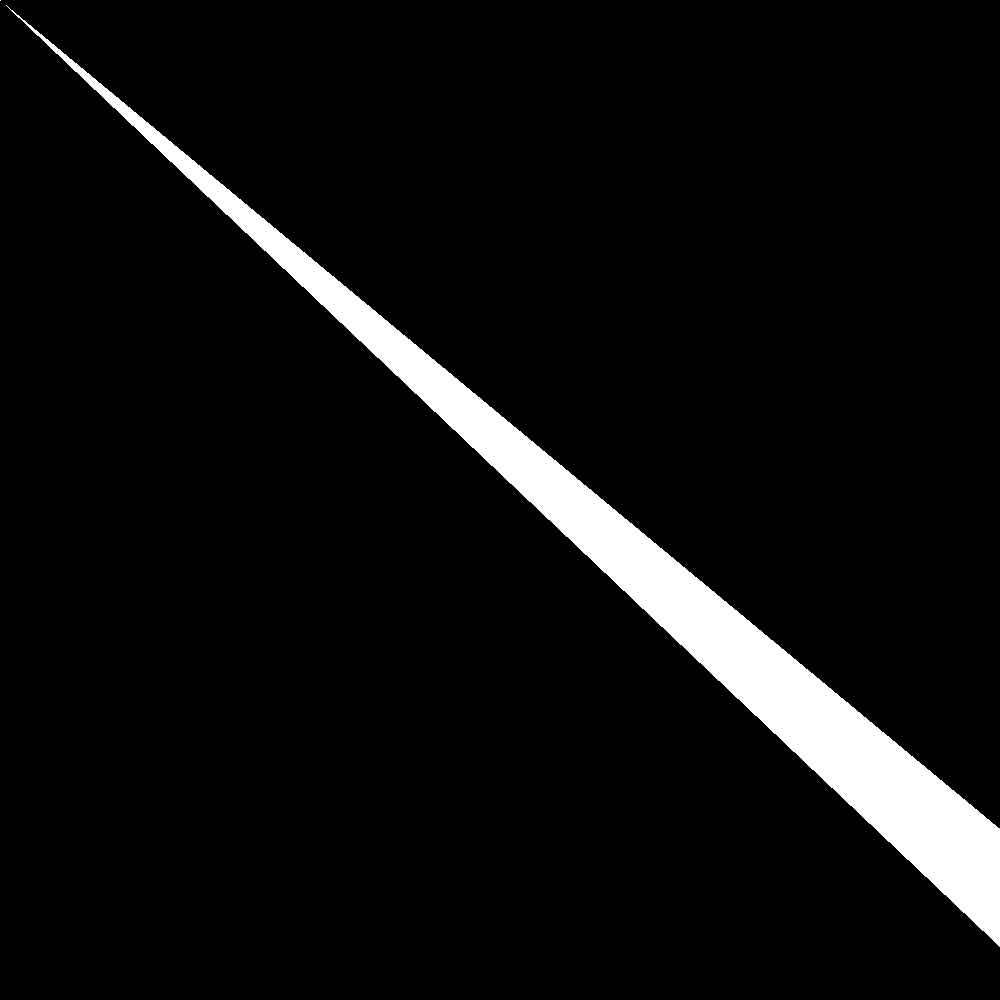

In [42]:
data = numpy.zeros((1000, 1000, 3), dtype=numpy.uint8)
for key, value in results_2_1s.items():
    x,y = key
    data[x, y] = [255, 255, 255]
    
image = Image.fromarray(data)
image

In [88]:
len([y for x, y in results_2_1s.keys() if x == 600])

90

In [148]:
results_2_5000 = dict()
for x in range(1100, 1800):
    for y in range(1100, 1800):
        outputs = intcode_2(program,[x,y], print_outputs=False)
        results_2_5000[tuple([x, y])] = outputs[0][0]

In [ ]:
# results_2_5000 = dict()
# for x in range(0, 5000):
#     for y in range(0, 5000):
#         outputs = intcode_2(program,[x,y], print_outputs=False)
#         results_2_5000[tuple([x, y])] = outputs[0][0]

In [149]:
results_2_1s_5000 = {key: value for key, value in results_2_5000.items() if value}

In [150]:
current_key = None
for key, value in results_2_1s_5000.items():
    try:
        for x in range(key[0], key[0]+100):
            for y in range(key[1], key[1]+100):
                if tuple([x, y]) not in results_2_1s_5000:
                    raise BreakOut
        current_key = key
        break
    except BreakOut:
        pass
    

In [151]:
current_key

(1356, 1537)

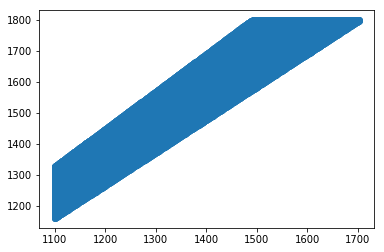

In [153]:
# data = numpy.zeros((1200, 1200, 3), dtype=numpy.uint8)
data_2 = numpy.zeros((1800, 1800), dtype=numpy.uint8)
for key, value in results_2_1s_5000.items():
    x,y = key
#     data[x, y] = [255, 255, 255]
    data_2[x][y] = 1
    
# image = Image.fromarray(data)
# image
x,y = numpy.argwhere(data_2 == 1).T

plt.scatter(x,y)
plt.show()

In [154]:
current_key[0]*10000+current_key[1]

13561537

In [124]:
len([(x,y) for x, y in results_2_1s_5000.keys() if x == 1149])

0

In [140]:
data_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)